- ### Planteamiento del problema:

¿Qué tipo de usuario tiene mayor probabilidad de hacerse parte de un depósito a largo plazo?

In [89]:
# Se importa el dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
dataframe = pd.read_csv(url, sep = ';')

- ### Exploración y limpieza de datos:

In [90]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')
print()
print(dataframe.info())

Filas: 41188 | Columnas: 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  co

In [91]:
dataframe.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [92]:
print(dataframe.head(2))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  

[2 rows x 21 columns]


In [93]:
dataframe.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las clases.
- Hay 41.188 registros y 21 clases incluyendo la clase a predecir.
- Hay 11 variables categóricas y 10 numéricas.

In [94]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated(subset = dataframe.columns).sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 12 registros duplicados.
El % de registros "duplicados" es 0.0002913469942701758.


De acuerdo a las clases existentes, no existe un identificador único de cada registro. Es decir, puede existir un registro que python identifique como "duplicado" y sin embargo en el caso real no lo sea. Pueden existir coincidencias sin implicar datos duplicados.

Además, el % de supuestos "duplicados" es prácticamente despreciable, por lo tanto se toma la decisión de no eliminar "duplicados".

Inicialmente todas las clases parecen relevantes respecto a la variable a predecir. Es por ello que no se eliminará ninguna.

- ### Análisis univariante:

##### Para variables categóricas

/tmp/ipykernel_629/2112555418.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_629/2112555418.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')


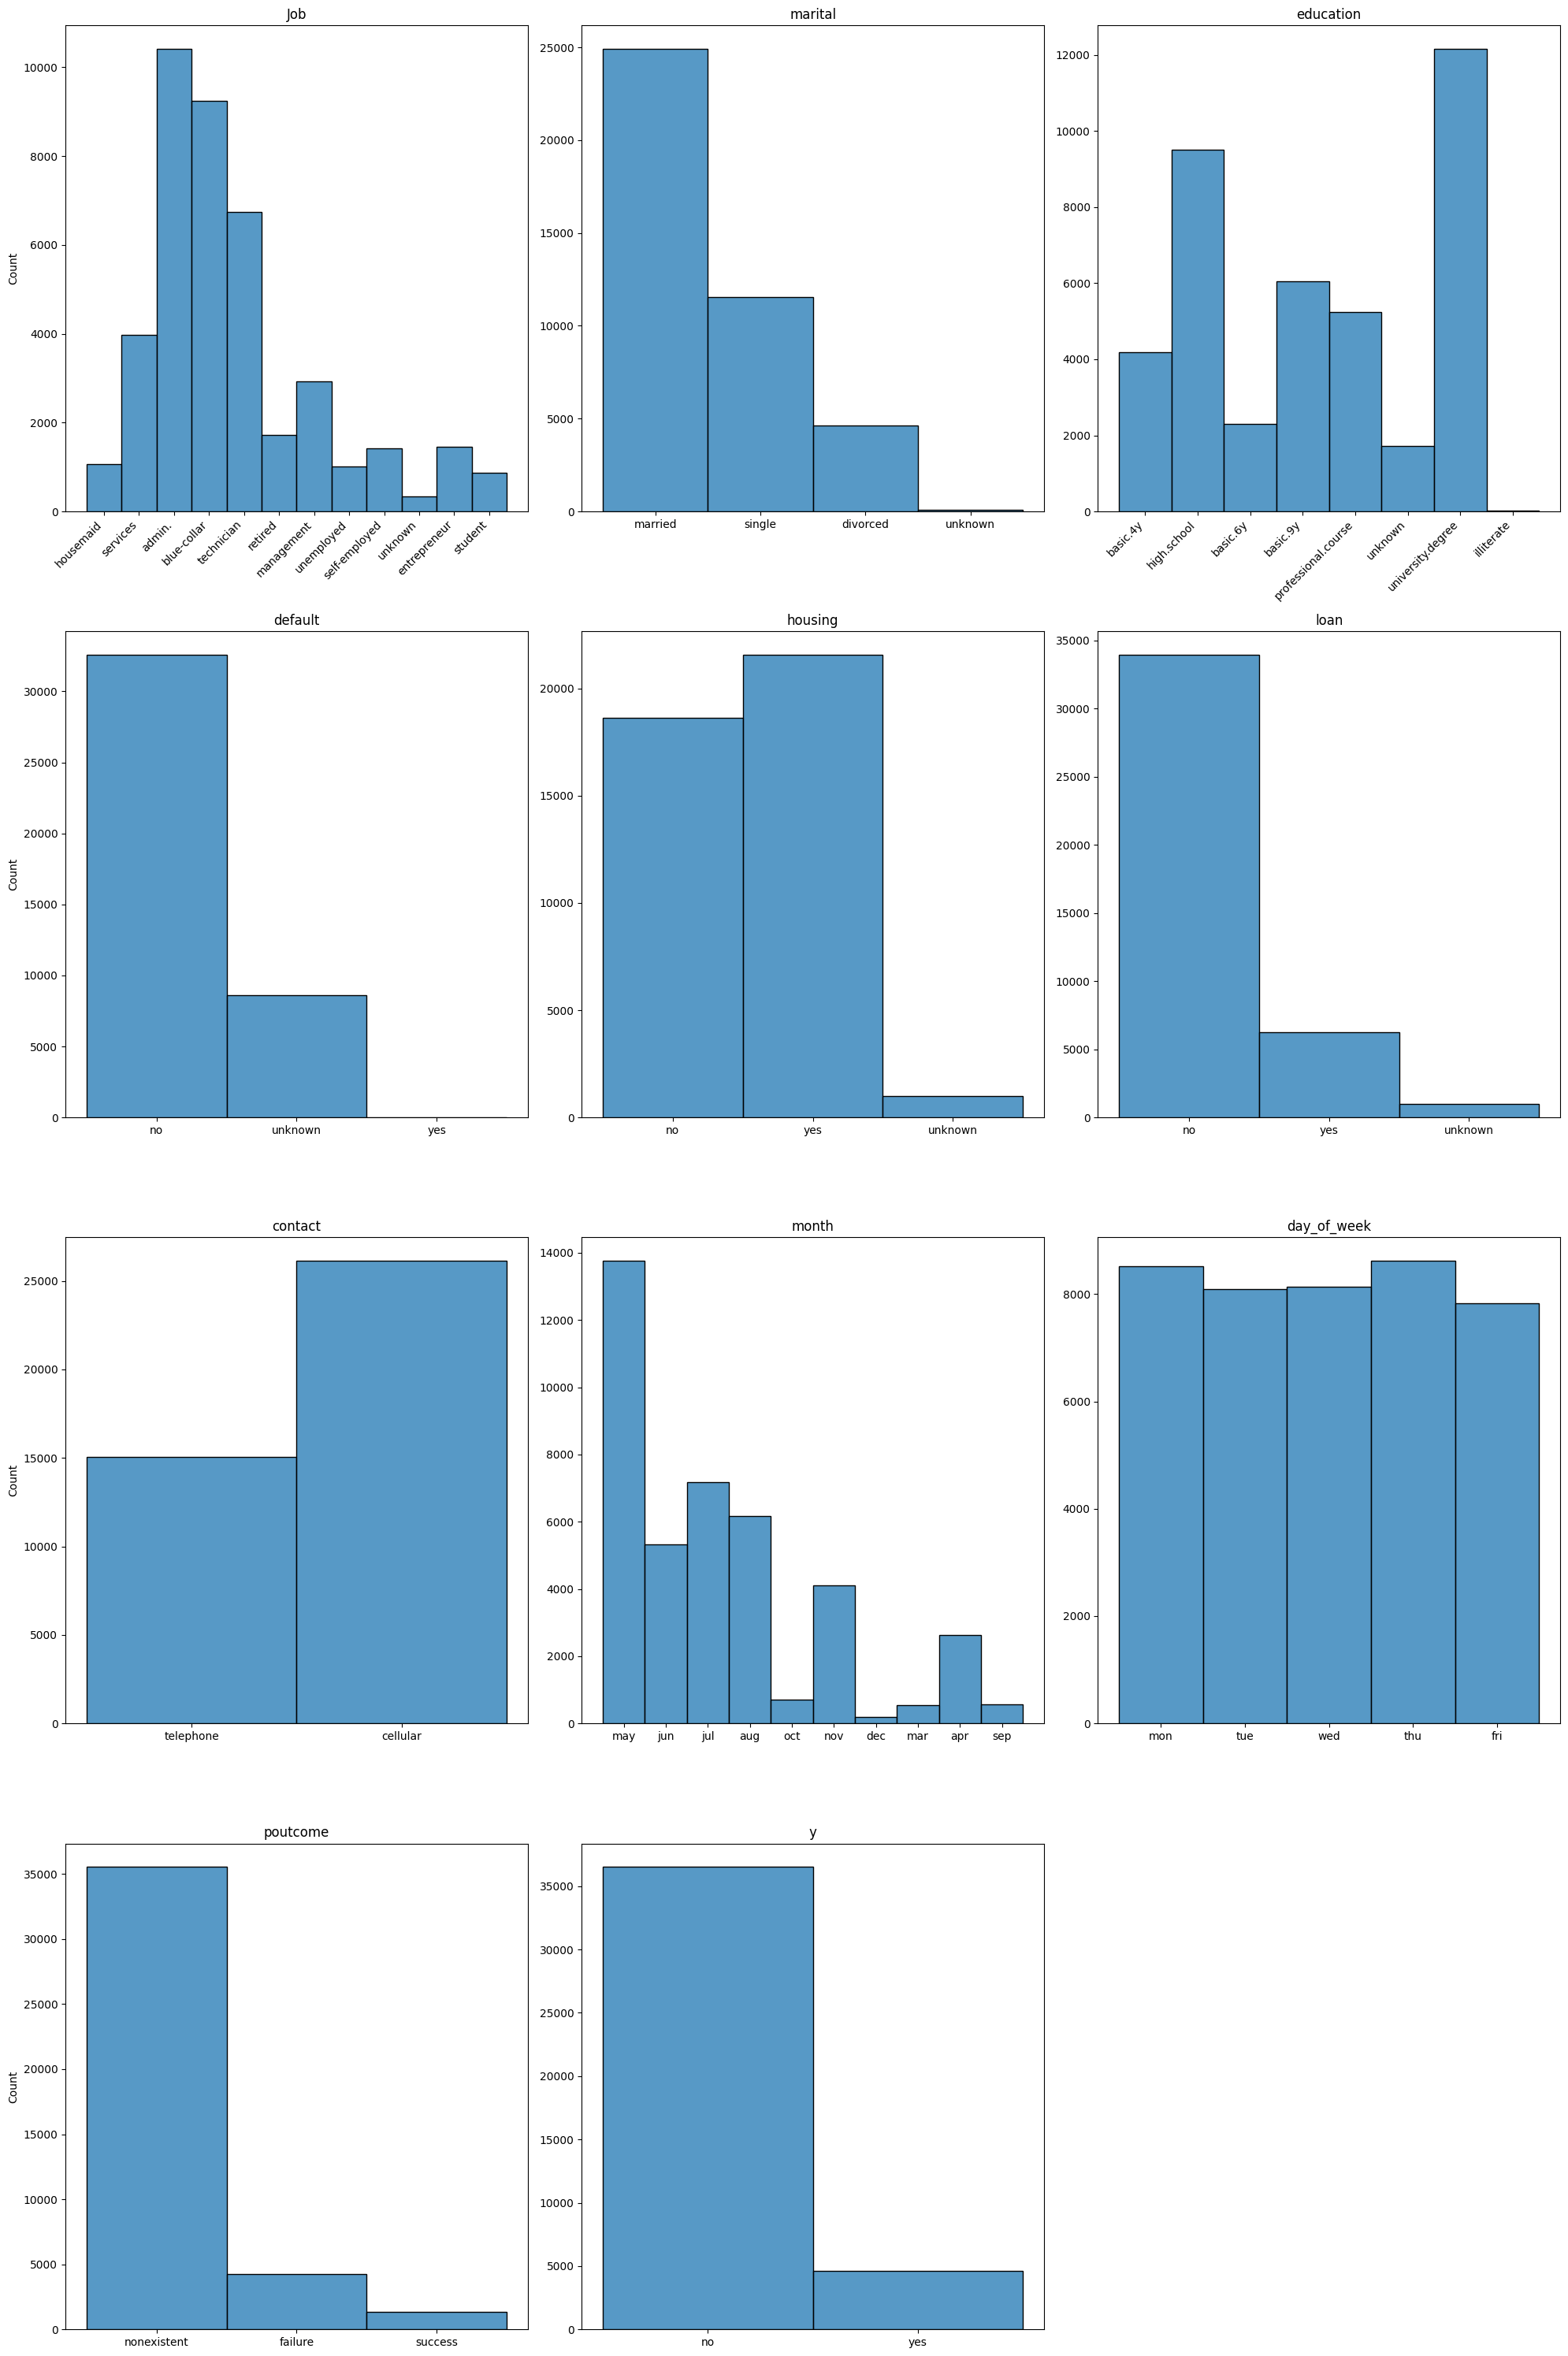

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4,3, figsize = (20, 30))

sns.histplot(ax = axis[0, 0], data = dataframe, x = 'job').set(xlabel = None, title = 'Job')
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
sns.histplot(ax = axis[0, 1], data = dataframe, x = 'marital').set(ylabel = None, xlabel = None, title = 'marital')
sns.histplot(ax = axis[0, 2], data = dataframe, x = 'education').set(ylabel = None, xlabel = None, title = 'education')
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')


sns.histplot(ax = axis[1, 0], data = dataframe, x = 'default').set(xlabel = None, title = 'default')
sns.histplot(ax = axis[1, 1], data = dataframe, x = 'housing').set(ylabel = None, xlabel = None, title = 'housing')
sns.histplot(ax = axis[1, 2], data = dataframe, x = 'loan').set(ylabel = None, xlabel = None, title = 'loan')

sns.histplot(ax = axis[2, 0], data = dataframe, x = 'contact').set(xlabel = None, title = 'contact')
sns.histplot(ax = axis[2, 1], data = dataframe, x = 'month').set(ylabel = None, xlabel = None, title = 'month')
sns.histplot(ax = axis[2, 2], data = dataframe, x = 'day_of_week').set(ylabel = None, xlabel = None, title = 'day_of_week')

sns.histplot(ax = axis[3, 0], data = dataframe, x = 'poutcome').set(xlabel = None, title = 'poutcome')
sns.histplot(ax = axis[3, 1], data = dataframe, x = 'y').set(ylabel = None, xlabel = None, title = 'y')

fig.delaxes(axis[3, 2])

plt.tight_layout()

plt.show()

In [96]:
credito_yes = dataframe[dataframe['default']=='yes']['default'].value_counts().get('yes', 0)
print(f"La cantidad de clientes sin crédito vigente es {credito_yes}")

La cantidad de clientes sin crédito vigente es 3


- Los trabajos más populares son admin., blue-collar, technician y services. El top 3 de trabajos más populares tienen el doble o más de personas.
- La mayoría están casados, luego vienen los solteros y por último los divorciados.
- El top 3 de educación es university.degree, high-school y basic-9y de más popular a menos popular.
- La gran mayoría de los clientes no tienen créditos vigentes, sólo tres tienen créditos vigentes.
- La mayoría tiene préstamo para casa y un poco menos no lo tienen.
- 